<h1><center>Diplomado de Ciencias de Datos - Trabajo Final - Octubre 2021</center></h1> 
<h2><center>Caso Práctico: Sistema Provincial de Expedientes (SIE)</center></h2> 
<h3><center>5° Parte</center></h3>
<h4><center>Ing. Romina C. Scarazzini</center></h4>

___
# Contenido
- Limpieza de Datos con Power BI: Para ver el detalle de lo realizado en este paso, ver el documento: "Limpieza de Datos con Power BI.pdf"
- Exploración  y análisis de los datos
- Análisis de las características de Series Temporales (EDA)
- **Aplicación de modelos de Machine Learning, enfocados a Series Temporales**
  - **Paquetes de StatModels**
    - **SMA: Promedio móvil simple (Simple Moving Average)**
    - **EWMA: Promedio móvil ponderado exponencialmente (Exponentially Weighted Moving Average)**
    - **Método de Suavizado Simple**
    - **Método de Suavizado Doble** 
    - **Método de Suavizado Triple** 
    - **Método de Suavizado Optimizado con Wandb** 
- **Predicciones 2021**

___
# Importación de Paquetes

In [2]:
# Instalación de paquetes para tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Instalación de paquetes para gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Declaración del estilo
#===================================
plt.style.use("bmh")

#Configuración del tamaño de las visualizaciones para que se muestren bien en Jupyter
#==============================================
plt.rcParams["figure.figsize"] = 16, 5

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para grilla de hiperparámetros del paquete Wandb
#======================================================
from sklearn.model_selection import ParameterGrid

# Wandb (para optimización automática de hiperparámetros)
#====================================
import wandb

#from tqdm.notebook import tqdm

### Paquetes para la Evaluación de Error de los Modelos

In [3]:
# Error Porcentual Absoluto Medio (MAPE)
# Este es uno de lo más usados para Series de Tiempo
#==========================================================
from sklearn.metrics import mean_absolute_percentage_error

# Error absoluto medio: Mean Squared Error (MAE)
#==========================================================
from sklearn.metrics import mean_absolute_error


#Error cuadrático medio: Mean Squared Error (MSE)
#===================================================
from sklearn.metrics import mean_squared_error

#Error logarítmico cuadrático medio
#===================================================
from sklearn.metrics import mean_squared_log_error

## Importación de Statsmodels
Statsmodels es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos.

In [4]:
# Suavizado Exponencial Simple
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Suavizado Exponencial Doble y Triple
from statsmodels.tsa.holtwinters import ExponentialSmoothing

___
# Recupero los dataset trabajados en la 1° Parte del trabajo

In [5]:
# Defino como índice la 1° columna y diciendo que es una fecha
#======================================================================
df_total = pd.read_csv("df_total.csv", sep=';', index_col=0, parse_dates=True)
df_train = pd.read_csv("df_train.csv", sep=';', index_col=0, parse_dates=True)
df_test = pd.read_csv("df_test.csv", sep=';', index_col=0, parse_dates=True)
df_total.head()

,Cant_Expte
Fecha_Ini_Expte,
2011-01-03,1144.0
2011-01-04,1217.0
2011-01-05,1326.0
2011-01-06,1377.0
2011-01-07,1388.0


In [15]:
df_train.tail()

,Cant_Expte
Fecha_Ini_Expte,
2018-12-25,1197.0
2018-12-26,1197.0
2018-12-27,1150.0
2018-12-28,1574.0
2018-12-31,1.0


In [7]:
df_test.head()

,Cant_Expte
Fecha_Ini_Expte,
2019-01-01,1.0
2019-01-02,974.0
2019-01-03,1309.0
2019-01-04,1093.0
2019-01-07,1165.0


In [6]:
# Recupero los expedientes agrupados por semana
#=============================================================================
df_Week = pd.read_csv("df_Week.csv", sep=';', index_col=0, parse_dates=True)
#df_Week = df_Week.rename(columns={'index': 'Cant_Expte'})

In [7]:
# División de los datos agrupados semanales: 80/20
#=================================================
size = int(len(df_Week)*0.8)
df_train_w = df_Week.iloc[:size]
df_test_w = df_Week.iloc[size:]

In [29]:
df_train_w.tail()

,Cant_Expte
Fecha_Ini_Expte,
2018-12-02,6095
2018-12-09,5713
2018-12-16,7705
2018-12-23,6712
2018-12-30,3923


In [30]:
df_test_w.head()

,Cant_Expte
Fecha_Ini_Expte,
2019-01-06,3387
2019-01-13,5638
2019-01-20,5528
2019-01-27,4155
2019-02-03,4000


___
# Métodos de Suavizado
## SMA: Promedio móvil simple (Simple Moving Average)

$SMA=\frac{x_1+x_2+...+x_n}{n} $

donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $n$ períodos atrás.

In [8]:
#Window es el espacio temporal que estoy considerando para calcular las estimaciones por el método promedio móvil simple.
#====================================================================================
df_train['SMA'] = df_train['Cant_Expte'].rolling(window=260).mean()

In [12]:
df_train.head(15)

,Cant_Expte,SMA
Fecha_Ini_Expte,,
2011-01-03,1144.0,NaN
2011-01-04,1217.0,NaN
2011-01-05,1326.0,NaN
2011-01-06,1377.0,NaN
2011-01-07,1388.0,NaN
2011-01-10,1260.0,NaN
2011-01-11,1204.0,NaN
2011-01-12,1058.0,NaN
2011-01-13,1320.0,NaN


### Gráfico: Serie de Tiempo y Promedio Móvil Simple (SMA)

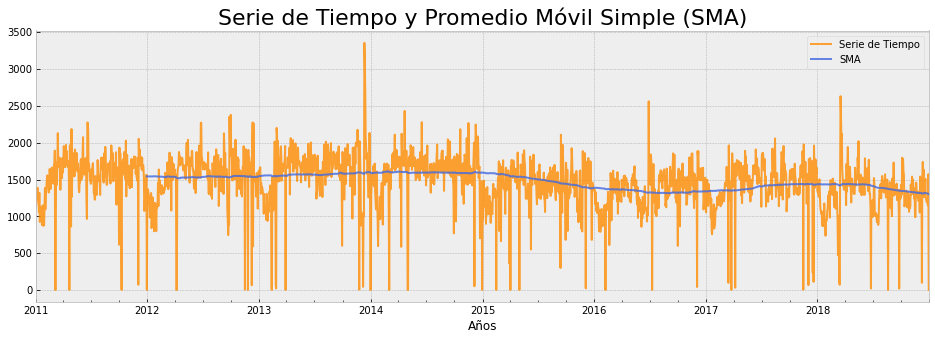

In [9]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['SMA'].plot(ax=ax, label='SMA',color="royalblue", alpha=0.8)
plt.title("Serie de Tiempo y Promedio Móvil Simple (SMA)", fontsize=22)
plt.xlabel("Años")
ax.legend();

#### Desventajas de este método
- Le da el mismo peso a todas las observaciones de los datos, sin tener en cuenta la antigüedad de los mismos
- Hay valores nulos. En este caso, no se puede calcular hasta tener 260 días (1 año laboral)

## EWMA: Promedio Móvil Ponderado Exponencialmente (Exponentially Weighted Moving Average)

EWMA nos permitirá reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA, la fórmula con la que se calculan las estimaciones es:

### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Donde $x_t$ son los valores de la variable, $w_i$ son los pesos (desde $i=0$ hasta $t$), y la $y_t$ es la estimación resultante.

La pregunta es ¿cómo se deben definir los pesos $w_i$?

Esto depende del argumento <tt>adjust</tt> dentro de la función <tt>.ewm()</tt>.

Cuando <tt>adjust=True</tt> (por defecto), los pesos se calculan con esta ecuación: $w_i = (1 - \alpha)^i$

Lo cual resulta en estas estimaciones:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Cuando <tt>adjust=False</tt> las estimaciones se calculan como:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

que es equivalente a usar estos pesos:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{si } i < t \\
    (1 - \alpha)^i        & \text{si } i = t.
\end{cases}\end{split}

El parámetro de suavizado $\alpha$ tiene que ser un valor $0<\alpha≤1$.
Es posible pasar directamente el valor del parámetro, pero una mejor práctica es pensar en él como una función de estos tres posibles factores:
1. Span (duración)
2. Center of mass (centro de masa)
3. Half-life (vida media)

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{para una duracion (span)}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{para un centro de masa}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{para un parametro half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponde a lo que comúnmente se llama un "promedio móvil de N-períodos"
* <strong>Center of mass</strong> tiene una interpretación más física y se puede pensar en términos de la duración: $c=(s−1)/2$
* <strong>Half-life</strong> es el período de tiempo para que el peso exponencial se reduzca a la mitad.
* <strong>Alpha</strong> es el parámetro de suavizado directamente.

Tenemos que pasar alguno de esos argumentos a la función. En nuestro ejemplo vamos a usar <tt>span=260</tt>.

In [10]:
df_train['EWMA'] = df_train['Cant_Expte'].ewm(span=260,adjust=False).mean()

In [12]:
df_train.head(15)

,Cant_Expte,SMA,EWMA
Fecha_Ini_Expte,,,
2011-01-03,1144.0,NaN,1144.000000
2011-01-04,1217.0,NaN,1144.559387
2011-01-05,1326.0,NaN,1145.949736
2011-01-06,1377.0,NaN,1147.720237
2011-01-07,1388.0,NaN,1149.561461
2011-01-10,1260.0,NaN,1150.407733
2011-01-11,1204.0,NaN,1150.818402
2011-01-12,1058.0,NaN,1150.107150
2011-01-13,1320.0,NaN,1151.409011


### Gráfico: Serie de Tiempo y Promedio Móvil Ponderado Exponencialmente (EWMA)

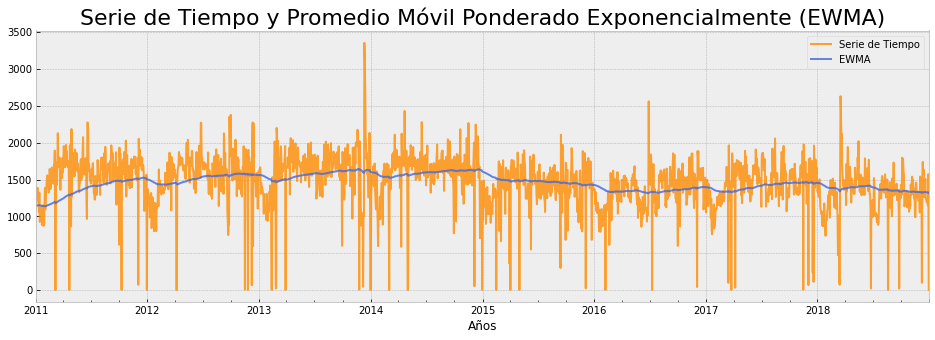

In [11]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['EWMA'].plot(ax=ax, label='EWMA',color="royalblue", alpha=0.8)
plt.title("Serie de Tiempo y Promedio Móvil Ponderado Exponencialmente (EWMA)", fontsize=22)
plt.xlabel("Años")
ax.legend();

#### Colclusiones
- Este tipo de tendencia de estacionalidad es mas acorde porque se ha especificado que los puntos más cercanos al presente sean más pesados que los puntos más antiguos
- Además aquí no se tiene el problema de falta de valores al principio

### Gráfico: Comparación de la Serie Temporal, SMA y EWMA

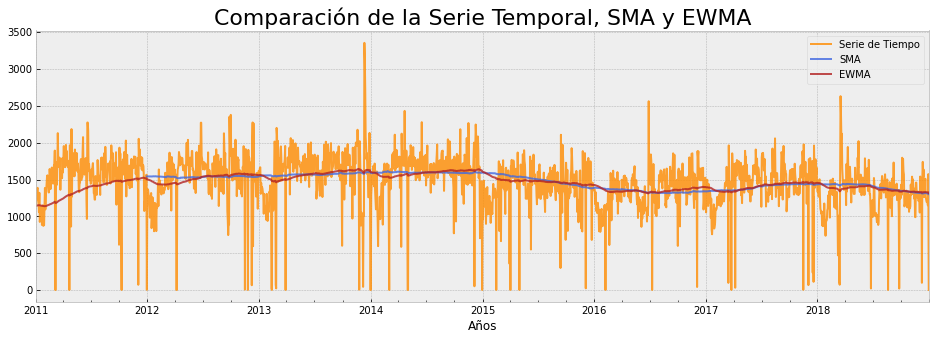

In [12]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['SMA'].plot(ax=ax, label='SMA',color="royalblue", alpha=0.8)
df_train['EWMA'].plot(ax=ax, label='EWMA',color="firebrick", alpha=0.8)
plt.title("Comparación de la Serie Temporal, SMA y EWMA", fontsize=22)
plt.xlabel("Años")
ax.legend();

#### Concluisiones
Tanto SMA como EWMA hacen un mal trabajo de pronóstico en nuestra serie de tiempo

___
# Métodos Suavizado Exponencial
Este método tiene en cuenta factores como la tendencia y la estacionalidad.
En el <strong> Suavizado exponencial doble </strong> (también conocido como Método de Holt) presentamos un nuevo factor de suavizado $\beta$ (beta) que aborda la tendencia:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
y_t &= l_t + b_t & \text{    modelo estimado}\\
\hat y_{t+h} &= l_t + hb_t & \text{    modelo de pronósticos (} h = \text{# periodos en el futuro)}\end{split}


Con <strong> Suavizado exponencial triple </strong> (también conocido como Método Holt-Winters) presentamos un factor de suavizado $\gamma$ (gamma) que aborda la estacionalidad:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    estacionalidad}\\
y_t &= (l_t + b_t) c_t & \text{    modelo estimado}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    modelo de pronosticos (} m = \text{# periodos en el futuro)}\end{split}

Aquí $ L $ representa el número de divisiones por ciclo. En nuestro caso, mirando los datos diarios que muestran un patrón repetitivo cada año laboral, usaríamos $ L = 260 $.

En general, los valores más altos para $ \alpha $, $ \beta $ y $ \gamma $ (valores más cercanos a 1), ponen más énfasis en los datos recientes.

<div class="alert alert-info"><h3>Funciones:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>

In [13]:
#Configuro la frecuencia de la serie con 'b', lo cual indica Business days
#==============================================================================
df_train.index.freq = 'b'
df_train.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Fecha_Ini_Expte', length=2086, freq='B')

In [13]:
df_train.head()

,Cant_Expte,SMA,EWMA
Fecha_Ini_Expte,,,
2011-01-03,1144.0,NaN,1144.000000
2011-01-04,1217.0,NaN,1144.559387
2011-01-05,1326.0,NaN,1145.949736
2011-01-06,1377.0,NaN,1147.720237
2011-01-07,1388.0,NaN,1149.561461


___
## SuavizadoExponencial simple (SES)
El suavizado exponencial simple (SES) es lo mismo que promedio móvil ponderado exponencialmente (EWMA). Esto es así si el parámetro 'optimized' es igual a "False"

In [14]:
# Suavizado exponencial simple (SES) 
#====================================================================================================================================
span = 260
alpha = 2/(span+1)
df_train['SES'] = SimpleExpSmoothing(df_train['Cant_Expte']).fit(smoothing_level=alpha,optimized=True).fittedvalues.shift(-1)
df_train.head()

,Cant_Expte,SMA,EWMA,SES
Fecha_Ini_Expte,,,,
2011-01-03,1144.0,NaN,1144.000000,1491.519706
2011-01-04,1217.0,NaN,1144.559387,1489.416107
2011-01-05,1326.0,NaN,1145.949736,1488.163876
2011-01-06,1377.0,NaN,1147.720237,1487.312046
2011-01-07,1388.0,NaN,1149.561461,1486.551034


<div class = "alert alert-danger"> <strong> NOTA: </strong> por alguna razón, cuando <tt> optimized = False </tt> se pasa a <tt>.fit()</tt>, la función statsmodels <tt> SimpleExpSmoothing </tt> desplaza los valores ajustados una fila hacia abajo. Arreglamos esto agregando <tt>.shift(-1)</tt> después de <tt>.fittedvalues</tt> </div>

### Gráfico: SuavizadoExponencial simple (SES)

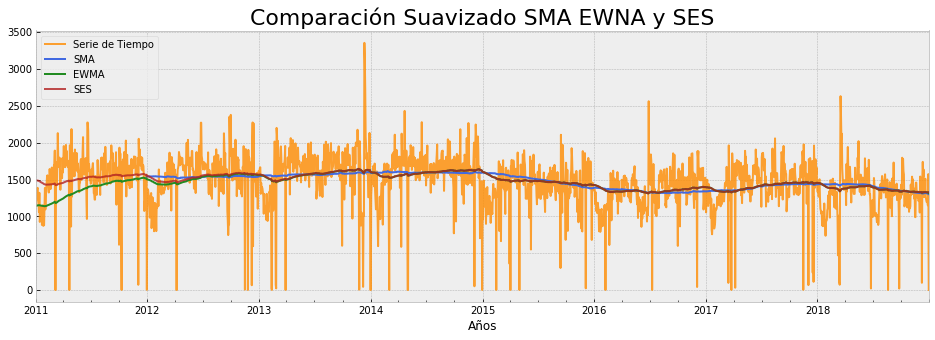

In [15]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['SMA'].plot(ax=ax, label='SMA',color="royalblue", alpha=1)
df_train['EWMA'].plot(ax=ax, label='EWMA',color="forestgreen", alpha=1)
df_train['SES'].plot(ax=ax, label='SES',color="firebrick", alpha=0.8)
plt.title("Comparación Suavizado SMA EWNA y SES", fontsize=22)
plt.xlabel("Años")
ax.legend();

### Conclusiones
- El método de suavizado exponencial simple (SES) de Statmodel es similar a EWMA
- Y es igual a EWMA si el parámetro 'optimized' es igual a "False"

___
## Suavizado Exponencial Doble
- Cuando el suavizado exponencial simple emplea solo un factor de suavizado $ \alpha $ (alpha), el suavizado exponencial doble agrega un segundo factor de suavizado $ \beta $ (beta) que aborda las tendencias en los datos
- Al igual que el factor alpha, los valores para el factor beta están entre cero y uno ($ 0 <\beta≤1 $). El beneficio aquí es que el modelo puede anticipar futuros aumentos o disminuciones donde el modelo de un solo factor solo tendría en cuenta los valores más recientes
- También podemos abordar diferentes tipos de cambio (crecimiento / decrecimiento) en la tendencia. Si una serie temporal muestra una tendencia inclinada en línea recta, se usaría un ajuste <strong> aditivo </strong>. Si la serie temporal muestra una tendencia exponencial (curva), se usaría un ajuste <strong> multiplicativo </strong>
>
Primero vamos a usar un ajuste estacional **aditivo**.

### Suavizado Exponencial Doble con tendencia aditiva

In [16]:
df_train['DESadd'] = ExponentialSmoothing(df_train['Cant_Expte'], trend = 'add').fit().fittedvalues.shift(-1)
df_train.head()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cant_Expte,SMA,EWMA,SES,DESadd
Fecha_Ini_Expte,,,,,
2011-01-03,1144.0,NaN,1144.000000,1491.519706,1151.470192
2011-01-04,1217.0,NaN,1144.559387,1489.416107,1168.528595
2011-01-05,1326.0,NaN,1145.949736,1488.163876,1204.025996
2011-01-06,1377.0,NaN,1147.720237,1487.312046,1243.245713
2011-01-07,1388.0,NaN,1149.561461,1486.551034,1277.614628


#### Gráfico: Serie Temporal, EWMA (Promedio Móvil Ponderado exponencialmente) y Suavizado Exponencial Doble con tendencia aditiva

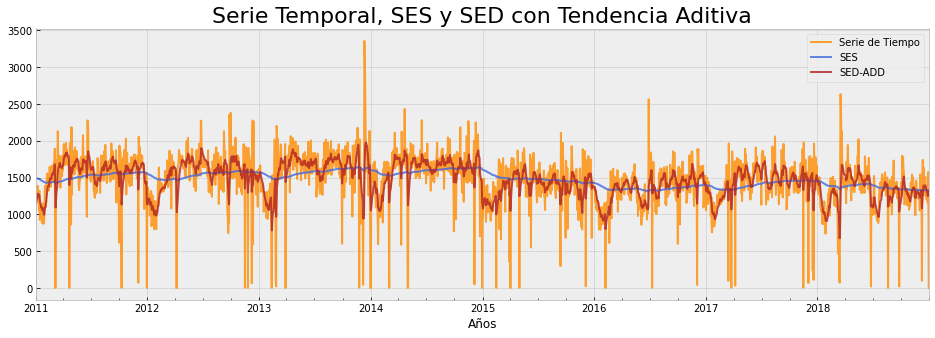

In [17]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['SES'].plot(ax=ax, label='SES',color="royalblue", alpha=0.8)
df_train['DESadd'].plot(ax=ax, label='SED-ADD',color="firebrick", alpha=0.8)
plt.title("Serie Temporal, SES y SED con Tendencia Aditiva", fontsize=22)
plt.xlabel("Años")
ax.legend();
# iloc[:1000].

#### Conclusiones
- Aquí podemos ver que con el suavizado exponencial doble con tendencia aditiva obtenemos una mejor representación de los datos

### Suavizado Exponencial Doble con tendencia multiplicativa

In [19]:
df_train['DESmul'] = ExponentialSmoothing(df_train['Cant_Expte'], trend='mul').fit().fittedvalues.shift(-1)
df_train.head()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cant_Expte,SMA,EWMA,SES,DESadd,DESmul
Fecha_Ini_Expte,,,,,,
2011-01-03,1144.0,NaN,1144.000000,1491.519706,1151.470192,1277.433893
2011-01-04,1217.0,NaN,1144.559387,1489.416107,1168.528595,1344.307962
2011-01-05,1326.0,NaN,1145.949736,1488.163876,1204.025996,1425.047970
2011-01-06,1377.0,NaN,1147.720237,1487.312046,1243.245713,1503.786032
2011-01-07,1388.0,NaN,1149.561461,1486.551034,1277.614628,1571.280736


#### Gráfico: Serie Temporal, SED con tendencia aditiva y SED con tendencia multiplicativa

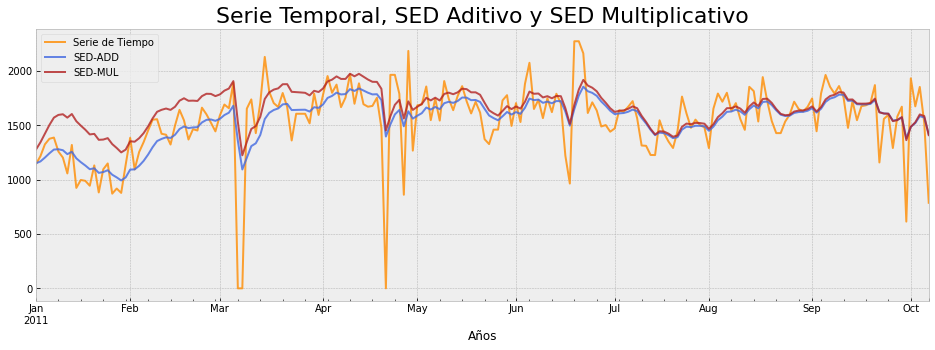

In [20]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].iloc[:200].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['DESadd'].iloc[:200].plot(ax=ax, label='SED-ADD',color="royalblue", alpha=0.8)
df_train['DESmul'].iloc[:200].plot(ax=ax, label='SED-MUL',color="firebrick", alpha=0.8)
plt.title("Serie Temporal, SED Aditivo y SED Multiplicativo", fontsize=22)
plt.xlabel("Años")
ax.legend();
#iloc[:200].

#### Conclusiones
- Vemos que en la primer parte de la serie, el suavizado exponencial doble aditivo ajusta mejor los datos que el suavizado exponencial doble multiplicativo
- Luego ambos ajustan los datos de forma similar

___
## Predicciones: Método de Suavizado Doble (SED)
Se usará una ventana temporal del futuro de 522 días laborales (2 años)

In [21]:
model_DESadd = ExponentialSmoothing(df_train['Cant_Expte'], trend = 'add').fit()
model_DESmul = ExponentialSmoothing(df_train['Cant_Expte'], trend= 'mul').fit()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
# Hago los pronósticos considerando un Forecast de ambos modelos con una ventana temporal de 730 días (2 años)
#===============================================================================
forecast_DESadd = model_DESadd.forecast(522)
forecast_DESmul = model_DESmul.forecast(522)

### Gráfico: Datos de trainning, test y las predicciones con SED-ADD y SED-MUL

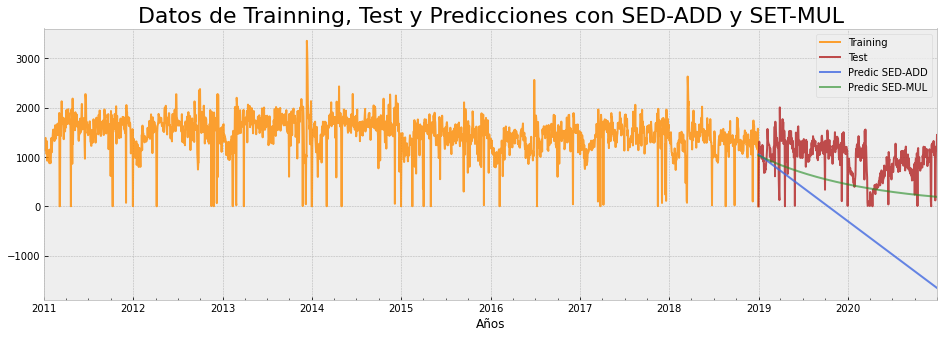

In [23]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Training', color="darkorange", alpha=0.8)
df_test['Cant_Expte'].plot(ax=ax, label='Test',color="firebrick", alpha=0.8)
forecast_DESadd.plot(ax=ax, label='Predic SED-ADD',color="royalblue", alpha=0.8)
forecast_DESmul.plot(ax=ax,label='Predic SED-MUL',color="forestgreen", alpha=0.6)
plt.title("Datos de Trainning, Test y Predicciones con SED-ADD y SET-MUL", fontsize=22)
plt.xlabel("Años")
ax.legend();
#.iloc[2000:]

#### Colcusiones
- Vemos en el gráfcio que los métodos de SED no son buenos para realizar prediccines en nuestra serie de tiempo

___
## Evaluación del Error del Modelo SED

### MAE (Error Absoluto Medio)

In [24]:
labels = ['SED_ADD','SED_MUL']
predic = [forecast_DESadd, forecast_DESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_absolute_error(df_test['Cant_Expte'], predic[i])
    print(f'MAE {labels[i]}: {error:11.10}')

MAE SED_ADD: 1299.101285
MAE SED_MUL: 526.4738199


### MAPE (Error Porcentual Absoluto Medio)

In [25]:
labels = ['SED_ADD','SED_MUL']
predic = [forecast_DESadd, forecast_DESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_absolute_percentage_error(df_test['Cant_Expte'], predic[i])
    print(f'MAPE {labels[i]}: {error:11.10}')

MAPE SED_ADD:  8.94872748
MAPE SED_MUL: 5.614510808


### MSE (Error Cuadrático Medio)

In [26]:
labels = ['SED_ADD','SED_MUL']
predic = [forecast_DESadd, forecast_DESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_squared_error(df_test['Cant_Expte'], predic[i])
    print(f'MSE {labels[i]}: {error:11.10}')

MSE SED_ADD: 2163726.457
MSE SED_MUL: 348107.7897


### Conclusiones
- Vemos que para el modelo SED, el mejor MAPE lo tiene el método multiplicativo
- Igualmente, viendo la gráfica concluimos que éste no es un buen método para predecir nuestra serie de tiempo

___
## Suavizado Exponencial Triple (SET)
- Suavizado exponencial triple o Holt-Winters, añade soporte para la tendencia y la estacionalidad

### Suavizado Exponencial Triple con tendencia aditiva

In [27]:
df_train['TESadd'] = ExponentialSmoothing(df_train['Cant_Expte'],trend='add',seasonal='add',seasonal_periods=260).fit().fittedvalues
df_train.head()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cant_Expte,SMA,EWMA,SES,DESadd,DESmul,TESadd
Fecha_Ini_Expte,,,,,,,
2011-01-03,1144.0,NaN,1144.000000,1491.519706,1151.470192,1277.433893,1143.997130
2011-01-04,1217.0,NaN,1144.559387,1489.416107,1168.528595,1344.307962,1216.994376
2011-01-05,1326.0,NaN,1145.949736,1488.163876,1204.025996,1425.047970,1325.991733
2011-01-06,1377.0,NaN,1147.720237,1487.312046,1243.245713,1503.786032,1376.989197
2011-01-07,1388.0,NaN,1149.561461,1486.551034,1277.614628,1571.280736,1387.986763


#### Gráfico: Serie Temporal y SET con tendencia aditiva

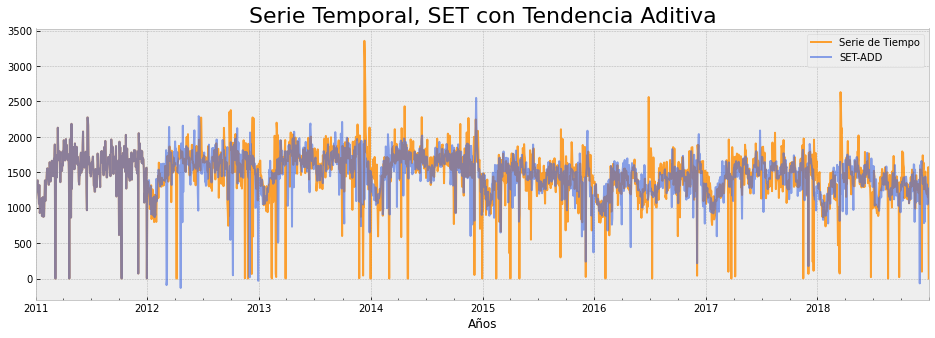

In [28]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['TESadd'].plot(ax=ax, label='SET-ADD',color="royalblue", alpha=0.6)
plt.title("Serie Temporal, SET con Tendencia Aditiva", fontsize=22)
plt.xlabel("Años")
ax.legend();

### Conclusiones
- En la primer parte de gráfico los datos de la serie son muy similares a los de SET con tendencia aditiva
- Luego vemos que el SET-ADD se ajusta bastante bien a la serie, solo que tiene más picos que los métodos con SED

### Suavizado Exponencial Triple con tendencia multiplicativa

In [29]:
df_train['TESmul'] = ExponentialSmoothing(df_train['Cant_Expte'],trend='mul',seasonal='mul',seasonal_periods=260).fit().fittedvalues
df_train.head()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cant_Expte,SMA,EWMA,SES,DESadd,DESmul,TESadd,TESmul
Fecha_Ini_Expte,,,,,,,,
2011-01-03,1144.0,NaN,1144.000000,1491.519706,1151.470192,1277.433893,1143.997130,1143.997871
2011-01-04,1217.0,NaN,1144.559387,1489.416107,1168.528595,1344.307962,1216.994376,1216.995483
2011-01-05,1326.0,NaN,1145.949736,1488.163876,1204.025996,1425.047970,1325.991733,1325.992635
2011-01-06,1377.0,NaN,1147.720237,1487.312046,1243.245713,1503.786032,1376.989197,1376.989828
2011-01-07,1388.0,NaN,1149.561461,1486.551034,1277.614628,1571.280736,1387.986763,1387.987216


#### Gráfico: Serie Temporal, SET con tendencia aditiva y SET con tendencia multiplicativa

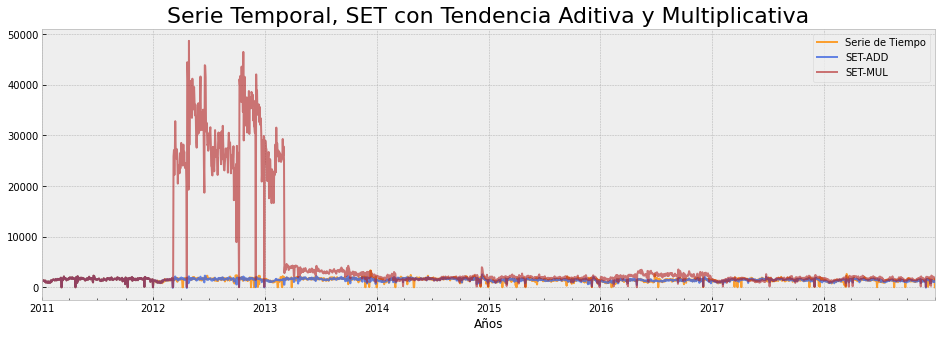

In [30]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].plot(ax=ax, label='Serie de Tiempo', color="darkorange", alpha=0.8)
df_train['TESadd'].plot(ax=ax, label='SET-ADD',color="royalblue", alpha=0.8)
df_train['TESmul'].plot(ax=ax, label='SET-MUL',color="firebrick", alpha=0.6)
plt.title("Serie Temporal, SET con Tendencia Aditiva y Multiplicativa", fontsize=22)
plt.xlabel("Años")
ax.legend();
#iloc[400:1000]

#### Conclusiones
- Vemos que en la primer parte de la serie, SET con tendencia aditiva, es casi igual a la serie de tiempo
- Luego vemos que SET-ADD ajusta mejor los datos de la serie que SET-MUL

___
## Predicciones: Métodos de Suavizado Exponencial Triple (SET)
Ventana temporal del futuro de 522 días laborales (2 años)

In [31]:
model_TESadd = ExponentialSmoothing(df_train['Cant_Expte'],trend='add',seasonal='add',seasonal_periods=260).fit()
model_TESmul = ExponentialSmoothing(df_train['Cant_Expte'],trend='mul',seasonal='mul',seasonal_periods=260).fit()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
# Hago los pronósticos considerando un Forecast de ambos modelos con una ventana temporal de 522 días laborales (2 años)
#===============================================================================
forecast_TESadd = model_TESadd.forecast(522)
forecast_TESmul = model_TESmul.forecast(522)

### Gráfico: Datos de trainning, test y las predicciones con SET-ADD y SET-MUL

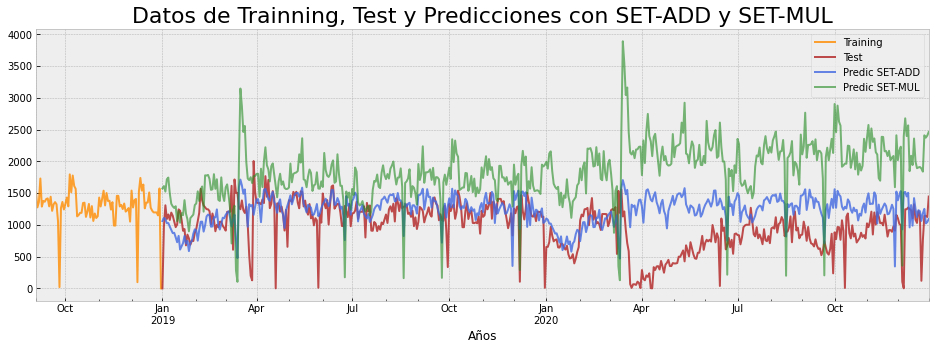

In [33]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].iloc[2000:].plot(ax=ax, label='Training', color="darkorange", alpha=0.8)
df_test['Cant_Expte'].plot(ax=ax, label='Test',color="firebrick", alpha=0.8)
forecast_TESadd.plot(ax=ax, label='Predic SET-ADD',color="royalblue", alpha=0.8)
forecast_TESmul.plot(ax=ax,label='Predic SET-MUL',color="forestgreen", alpha=0.6)
plt.title("Datos de Trainning, Test y Predicciones con SET-ADD y SET-MUL", fontsize=22)
plt.xlabel("Años")
ax.legend();
#.iloc[2000:]

#### Conclusiones
- Podemos ver que los datos originales tienen cierta estacionalidad con una leve variación de los ciclos que van disminuyendo en el tiempo
- La tendencia de nuestra serie es basicamente lineal
- El modelo de Suavizado Exponencial Triple con tendencia aditiva, realiza hasta el momento, la mejor predicción de los datos de nuestra serie

___
## Evaluación del Error del Modelo SET

### MAE (Error Absoluto Medio)

In [34]:
labels = ['SET_ADD', 'SET_MUL']
predic = [forecast_TESadd, forecast_TESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_absolute_error(df_test['Cant_Expte'], predic[i])
    print(f'MAE {labels[i]}: {error:11.10}')

MAE SET_ADD: 352.2762622
MAE SET_MUL: 910.2571199


### MAPE (Error Porcentual Absoluto Medio)

In [35]:
labels = ['SED_ADD','SED_MUL']
predic = [forecast_TESadd, forecast_TESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_absolute_percentage_error(df_test['Cant_Expte'], predic[i])
    print(f'MAE {labels[i]}: {error:11.10}')

MAE SED_ADD:  11.5978316
MAE SED_MUL: 17.68397979


### MSE (Error Cuadrático Medio)

In [36]:
labels = ['SET_ADD', 'SET_MUL']
predic = [forecast_TESadd, forecast_TESmul]  # Estas son variables, no son strings

for i in range(2):
    error = mean_squared_error(df_test['Cant_Expte'], predic[i])
    print(f'MSE {labels[i]}: {error:11.10}')

MSE SET_ADD: 226421.7374
MSE SET_MUL: 1133239.492


### Conclusiones
- Vemos que para el modelo **Suavizado Exponencial Triple**, el **MAPE más bajo** lo tiene el **método aditivo**
- También, viendo la gráfica concluimos que el mejor método para predecir nuestra serie es el **Suavizado Exponencial Triple con tendencia aditiva**

#### Ahora vamos a realizar una optimización de los hiperparámetros para buscar el modelo de Suavizado Exponecial Óptimo

___
## Optimización de Hiperparámetros del modelo "ExponentialSmoothing" con el paquete Wandb

In [37]:
params = {
    "trend": ["add", "mul", "additive", "multiplicative"],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", "additive", "multiplicative", None],
    "seasonal_periods": [5, 20, 22, 260],
    "initialization_method": [None, "estimated", "heuristic", "legacy-heuristic"]
}

parameter_grid = ParameterGrid(params)

len(parameter_grid)

640

In [63]:
# for index, parameter in tqdm(enumerate(parameter_grid, start=1), total=combinations):
#combinations = 100
datos_train = df_train.Cant_Expte
datos_test = df_test.Cant_Expte

for parameter in parameter_grid:
    run = wandb.init(project = "Expedientes", reinit = True)
    run.config.update(parameter)
   # print(parameter)
    
    model_SE = ExponentialSmoothing(datos_train, **parameter).fit()
    
   # results_SE = model_SE.fit()
    Pred_SE = model_SE.forecast(522)
    
    metrics = mean_absolute_percentage_error(datos_test, Pred_SE)
    metrics = {"MAPE": [metrics]}
    run.log(metrics)
    run.finish()
    
 #   if index >= combinations:
 #       break

wandb: Currently logged in as: rominacarmen (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: wandb version 0.12.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


### Resultados de la optimización de hiperparámetros con Wandb
Con un MAPE de **6,47%**, se obtienen las siguientes combinaciones de hiperparámetros:

Run Time | damped_trend |initialization_method |seasonal |seasonal_periods | trend|
:- | :- | :- | :- | :- | :-|
 4s | false | heuristic | additive | 260 | multiplicative|
 3s | false | heuristic | additive | 260 | mul|
 4s | false | heuristic | add      | 260 | multiplicative|
 4s | false | heuristic | add      | 260 | mul|
 3s | false | estimated | additive | 260 | multiplicative|
 4s | false | estimated | additive | 260 | mul|
 4s | false | estimated | add      | 260 | multiplicative|
 3s | false | estimated | add      | 260 | mul|

## Prueba de optimización con expedientes agrupados por semana

### Crear y entrenar el modelo de Suavizado Exponencial (SE) Optimizado
- Se probará el modelo con una de las combinaciones encontradas

In [38]:
#endog = df_train['Cant_Expte']
SE_O = ExponentialSmoothing(
   df_train['Cant_Expte'],
    trend='mul', 
    damped_trend= False, 
    seasonal='add',
    seasonal_periods=260, 
    initialization_method = 'heuristic',
    ).fit();

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Predicciones usando SE Optimizado

In [39]:
Pred_SE_O = SE_O.forecast(522)
Pred_SE_O= abs(Pred_SE_O)

### Gráfico: Datos de trainning, test y las predicciones con SE Optimizado

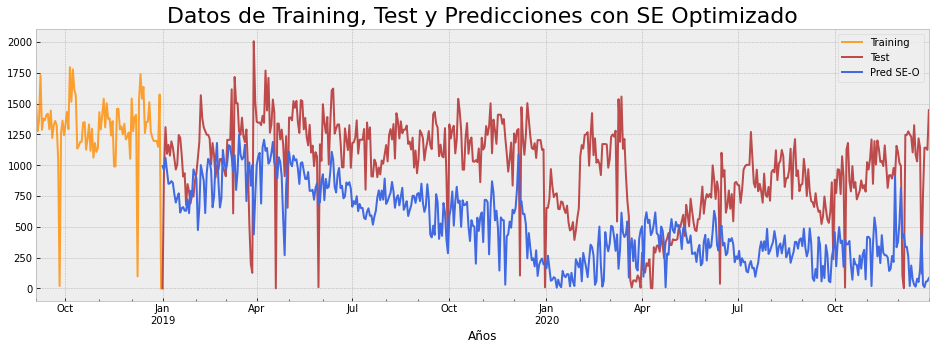

In [40]:
fig, ax=plt.subplots()
df_train['Cant_Expte'].iloc[2000:].plot(ax=ax, label='Training', color="darkorange", alpha=0.8)
df_test['Cant_Expte'].plot(ax=ax, label='Test',color="firebrick", alpha=0.8)
#forecast_TESadd.plot(ax=ax, label='Pred SET-ADD',color="royalblue", alpha=0.6)
#forecast_TESmul.plot(ax=ax,label='Pred - SET-MUL',color="forestgreen", alpha=0.6)
Pred_SE_O.plot(ax=ax,label='Pred SE-O',color="royalblue", alpha=1)
plt.title("Datos de Training, Test y Predicciones con SE Optimizado", fontsize=22)
plt.xlabel("Años")
ax.legend();
#.iloc[2000:]

___
## Evaluación del Error del Modelo SE Optimizado

### MAE (Error Absoluto Medio)

In [41]:
MAE = mean_absolute_error(df_test['Cant_Expte'],Pred_SE_O)
print(f'MAE del modelo SE-O: {MAE:11.10}')

MAE del modelo SE-O: 518.8420159


### MAPE (Error Porcentual Absoluto Medio)

In [42]:
MAPE = mean_absolute_percentage_error(df_test['Cant_Expte'],Pred_SE_O)
print(f'MAPE del modelo SE-O: {MAPE:11.10}')

MAPE del modelo SE-O: 6.435442355


### MSE (Error Cuadrático Medio)

In [43]:
MSE = mean_squared_error(df_test['Cant_Expte'],Pred_SE_O)
print(f'MSE del modelo SE-O: {MSE:11.10}')

MSE del modelo SE-O: 346150.2355


___
## Conclusiones Finales
- Se concluye que hasta el momento **el modelo de Suavizado Exponencial Optimizado (SE-O) es el mejor modelo** para predecir los datos de nuestra serie de tiempo

___
## Predicciones 2021
### Crear y entrenar el modelo SE Optimizado con todos los datos del dataset

In [44]:
SE_O_T = ExponentialSmoothing(
    df_total['Cant_Expte'],
    trend='mul', 
    damped_trend= False, 
    seasonal='add',
    seasonal_periods=260, 
    initialization_method = 'heuristic').fit()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Predicciones para el modelo SE Optimizado con todos los datos del dataset

In [45]:
Pred_SE_O_T = abs(SE_O_T.forecast(260))

### Gráfico: Cantidad de Expedientes y Predicciones 2021 usando SE Optimizado

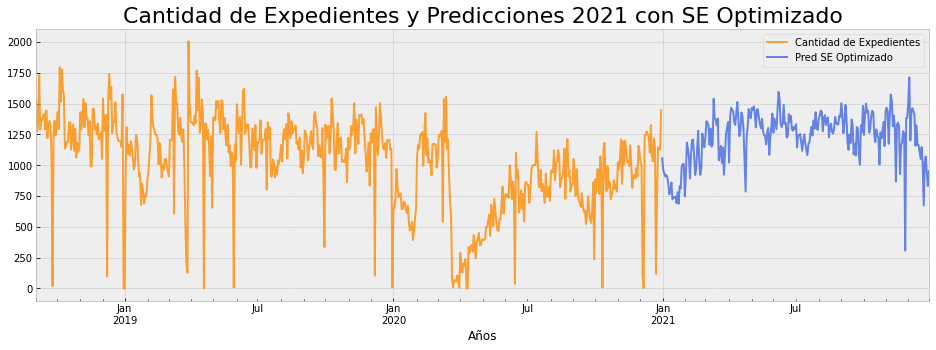

In [52]:
fig, ax=plt.subplots()
df_total['Cant_Expte'].iloc[2000:].plot(ax=ax, label='Cantidad de Expedientes', color="darkorange", alpha=0.8)
Pred_SE_O_T.plot(ax=ax,label='Pred SE Optimizado',color="royalblue", alpha=0.8)
plt.title("Cantidad de Expedientes y Predicciones 2021 con SE Optimizado", fontsize=22)
plt.xlabel("Años")
ax.legend();
#.iloc[2000:]

### Cálculo la cantidad de expedientes predecidos para el 2021 con el modelo SE-O

In [59]:
Pred_SE_O_T[:] = Pred_SE_O_T[:].astype(int)

In [60]:
Pred_SE_O_T.sum()

319774

___
## Predcciones Finales 2021
### Modelo Suavizado Exponencial con Hiperparámetros Optimizados (SE-O)
- **Cantidad de Expedientes: 319.774**
- **MAPE: 6,44%**

___
## Recupero los datos que tengo disponibles hasta julio 2021, para compararlos con mi predicción

In [47]:
# Defino como índice la 1° columna y diciendo que es una fecha
#======================================================================
df_2021 = pd.read_csv("df_Fecha_Ini_2021.csv", sep=';', index_col=0, parse_dates=True)
df_2021.head()

,Cant_Expte
Fecha_Ini_Expte,
2021-01-04,1069.0
2021-01-05,1084.0
2021-01-06,1003.0
2021-01-07,966.0
2021-01-08,910.0


### Gráfico: Comparación de predicciones 2021 con datos del 2021 disponibles hasta julio

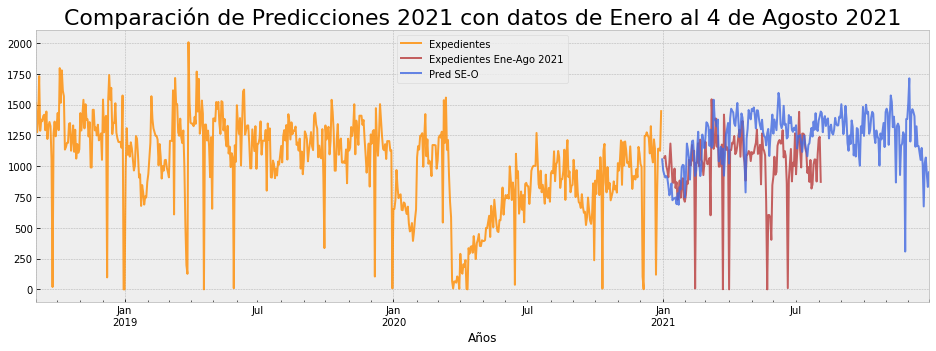

In [54]:
fig, ax=plt.subplots()
df_total['Cant_Expte'].iloc[2000:].plot(ax=ax, label='Expedientes', color="darkorange", alpha=0.8)
df_2021['Cant_Expte'].plot(ax=ax, label='Expedientes Ene-Ago 2021', color="firebrick", alpha=0.7)
Pred_SE_O_T.plot(ax=ax,label='Pred SE-O',color="royalblue", alpha=0.8)
plt.title("Comparación de Predicciones 2021 con datos de Enero al 4 de Agosto 2021", fontsize=22)
plt.xlabel("Años")
ax.legend();
#.iloc[2000:]

### Cantidad de Expedientes inicados en 2021 hasta julio

In [63]:
df_2021['Cant_Expte'].sum()

155637.0